<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/pca/simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

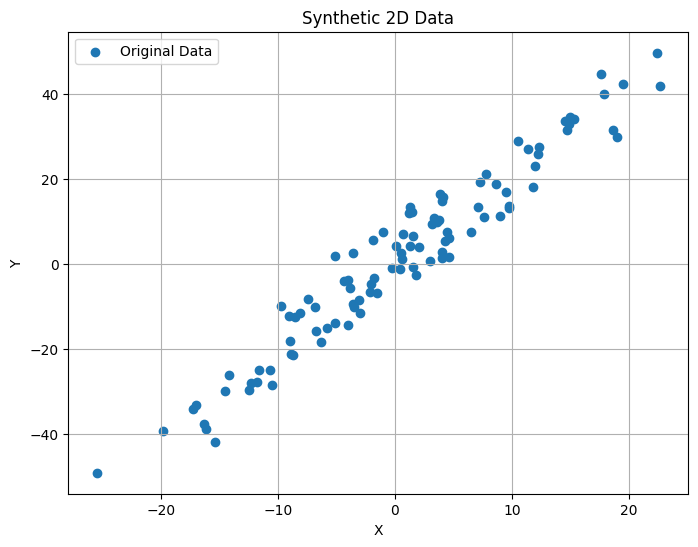

Covariance of Data [[102.60874942 211.10203024]
 [211.10203024 461.00685553]]
Eigenvalues: [  4.90282276 558.71278218] 
 Eigenvectors:  [[-0.90751033 -0.42002977]
 [ 0.42002977 -0.90751033]]


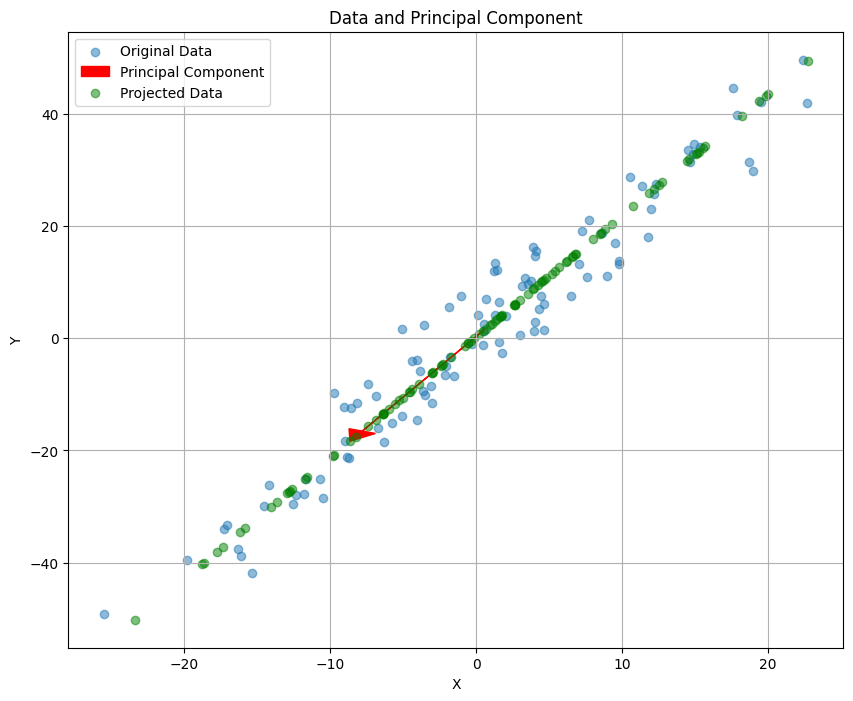

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate synthetic 2D data
np.random.seed(0)
x = np.random.normal(0, 10, 100)  # x-coordinates
y = 2 * x + np.random.normal(0, 5, 100)  # y-coordinates
data = np.column_stack((x, y))

# Plot the synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic 2D Data')
plt.grid(True)
plt.legend()
plt.show()

# Calculate the mean of the data
mean_data = np.mean(data, axis=0)

# Center the data by subtracting the mean
centered_data = data - mean_data

# Calculate the covariance matrix
cov_matrix = np.cov(centered_data, rowvar=False)

print('Covariance of Data',cov_matrix)


# Calculate the eigenvalues and eigenvectors of the covariance matrix
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

print('Eigenvalues:', eig_values, '\n', 'Eigenvectors: ', eig_vectors)


# Choose the eigenvector corresponding to the largest eigenvalue (Principal Component)
principal_component = eig_vectors[:, np.argmax(eig_values)]

# Project data onto the principal component
projected_data = np.dot(centered_data, principal_component)

# Re-plot the original data and its projection with the principal component as a red arrow

# Plot the original data and its projection
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, label='Original Data')

# Draw the principal component as a red arrow
plt.arrow(mean_data[0], mean_data[1], principal_component[0]*20, principal_component[1]*20,
          head_width=2, head_length=2, fc='r', ec='r', label='Principal Component')

# Plot the projected data as green points
plt.scatter(mean_data[0] + projected_data * principal_component[0],
            mean_data[1] + projected_data * principal_component[1],
            alpha=0.5, color='g', label='Projected Data')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Data and Principal Component')
plt.grid(True)
plt.legend()
plt.show()